In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
import plotly.express as px
# from itertools import combinations
from collections import Counter


# Visualize Missing Values
import missingno as msno
# Finding Most common words using wordcloud
from wordcloud import WordCloud

In [2]:
# import csv file
df = pd.read_csv('SalesData.csv', encoding= 'unicode_escape')
df.head()

User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     NaN       NaN  
3  23912.0     NaN       NaN  
4  23877.0     NaN       NaN

In [3]:
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


+ #### dropping unrelated/blank columns which are Status & Unnamed1 that have 0 non-null in the above

In [5]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)
df.head()

User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders   Amount  
0     Maharashtra   Western       Healthcare             Auto       1  23952.0  
1  Andhra Pradesh  Southern             Govt             Auto       3  23934.0  
2   Uttar Pradesh   Central       Automobile             Auto       3  23924.0  
3       Karnataka  Southern     Construction             Auto       2  23912.0  
4         Gujarat   Western  Food Processing             Auto       2  23877.0

+ #### check for null values


In [6]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

+ ##### the above tells me that the Column Amount have 12 Rows that doesn't have Amount of the goods and i will remove the rows in the next code

+ #### drop null values

In [7]:
df.dropna(inplace=True)

+ #### the amount  nan has been removed now so i will do the shape and info() again 

In [8]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [9]:
df.shape

(11239, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


+ ##### From the Above the Amount is in Float Format i want to Change it to Integer in the Next line

In [11]:
df['Amount'] = df['Amount'].astype('int')

In [12]:
df['Amount'].dtypes

dtype('int32')

+ #### checking all my column

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

+ #### i want to return the description of the data in the DataFrame (i.e. Count, Mean, Std, Min, Max etc) using describe() method

In [16]:
df.describe()

User_ID           Age  Marital_Status        Orders        Amount
count  1.123900e+04  11239.000000    11239.000000  11239.000000  11239.000000
mean   1.003004e+06     35.410357        0.420055      2.489634   9453.610553
std    1.716039e+03     12.753866        0.493589      1.114967   5222.355168
min    1.000001e+06     12.000000        0.000000      1.000000    188.000000
25%    1.001492e+06     27.000000        0.000000      2.000000   5443.000000
50%    1.003064e+06     33.000000        0.000000      2.000000   8109.000000
75%    1.004426e+06     43.000000        1.000000      3.000000  12675.000000
max    1.006040e+06     92.000000        1.000000      4.000000  23952.000000

# My Data is now Clean  so i will start mt Exploratory D.A.

+ #### plotting a bar chart for Gender and it's count

Text(0.5, 1.0, 'Fig.*: Gender per Sales')

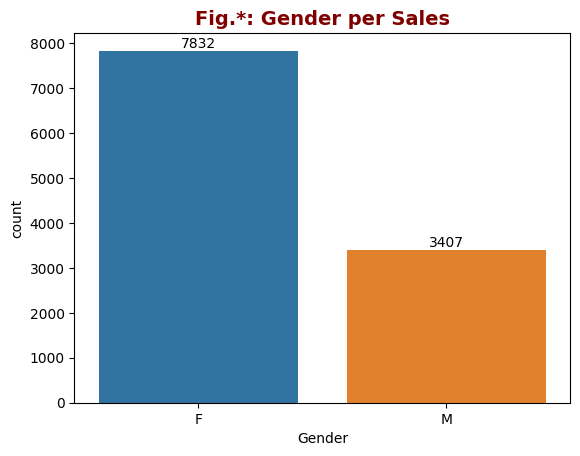

In [17]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Fig.*: Gender per Sales',  color='maroon', size=14, weight='bold')

# Most Purchasing Gender

In [18]:
most_sale_gender = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
most_sale_gender

Gender    Amount
0      F  74335853
1      M  31913276

*From above the that most of the buyers are females and even the purchasing power of females are greater than men*

+ # plotting a bar chart for gender vs total amount

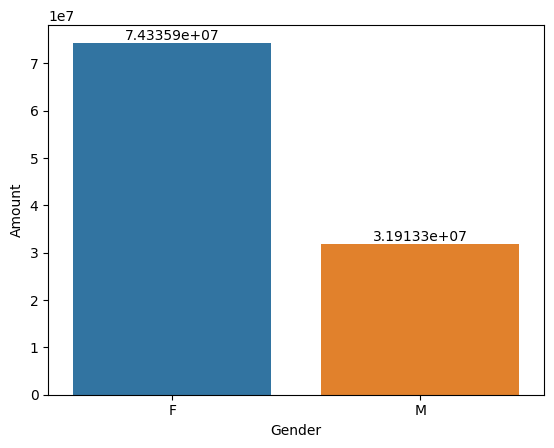

In [19]:
ade = sns.barplot(x = 'Gender',y= 'Amount' ,data = most_sale_gender)
for bars in ade.containers:
    ade.bar_label(bars)



+ #### Age group With Gender and their Purchasing Power out of the remaining total of 11239

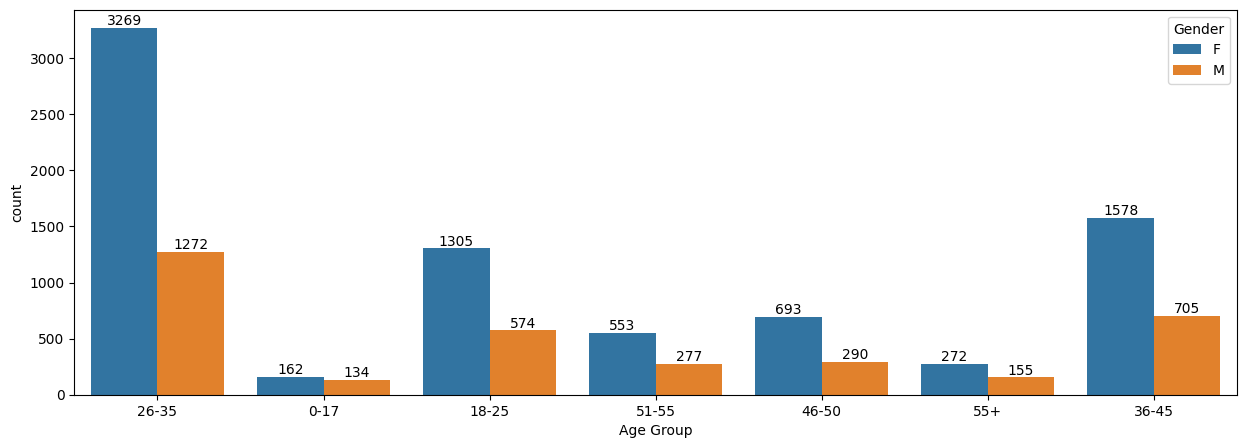

In [20]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

+ # Most Purchasing Age

In [21]:
most_sale_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
most_sale_age

Age Group    Amount
2     26-35  42613442
3     36-45  22144994
1     18-25  17240732
4     46-50   9207844
5     51-55   8261477
6       55+   4080987
0      0-17   2699653

#### From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

# Most Purchasing Age Visualization

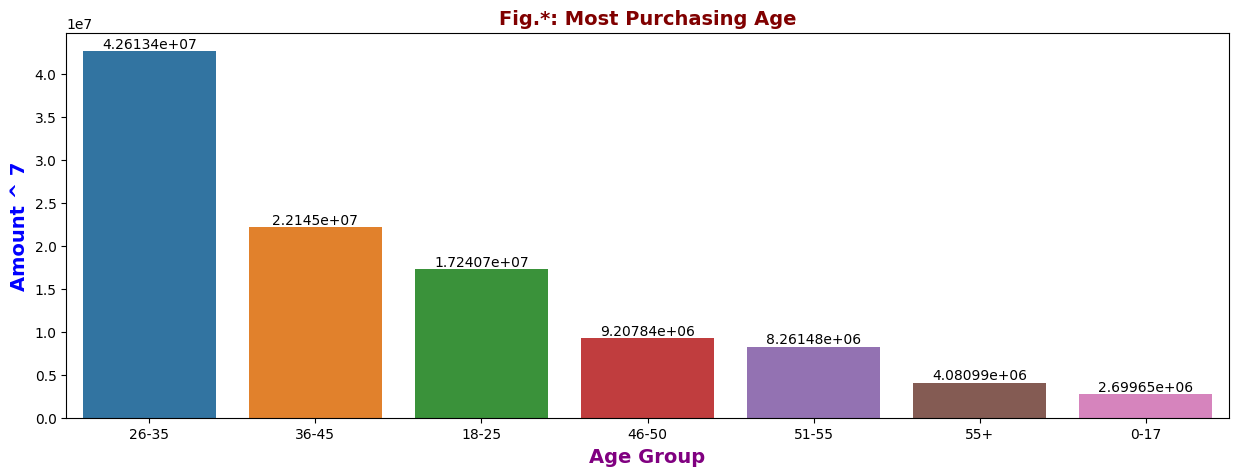

In [22]:

plt.figure(figsize=(15, 5))
ax = sns.barplot(x = 'Age Group',y= 'Amount' ,data = most_sale_age)


for bars in ax.containers:
    ax.bar_label(bars)
plt.ylabel('Amount ^ 7', color='blue', size=14, weight='bold' )
plt.xlabel('Age Group', color='purple', size=14, weight='bold' )
plt.title('Fig.*: Most Purchasing Age',  color='maroon', size=14, weight='bold')
plt.show()

## State

+ #### total number of orders from each states in Descending Order

In [23]:
total_order_per_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
total_order_per_state

State  Orders
14     Uttar Pradesh    4807
10       Maharashtra    3810
7          Karnataka    3240
2              Delhi    2740
9     Madhya Pradesh    2252
0     Andhra Pradesh    2051
5   Himachal Pradesh    1568
8             Kerala    1137
4            Haryana    1109
3            Gujarat    1066
1              Bihar    1062
6          Jharkhand     953
15       Uttarakhand     824
12         Rajasthan     555
11            Punjab     495
13         Telangana     312

+ ### Visualization of the State Purchase in descending order 

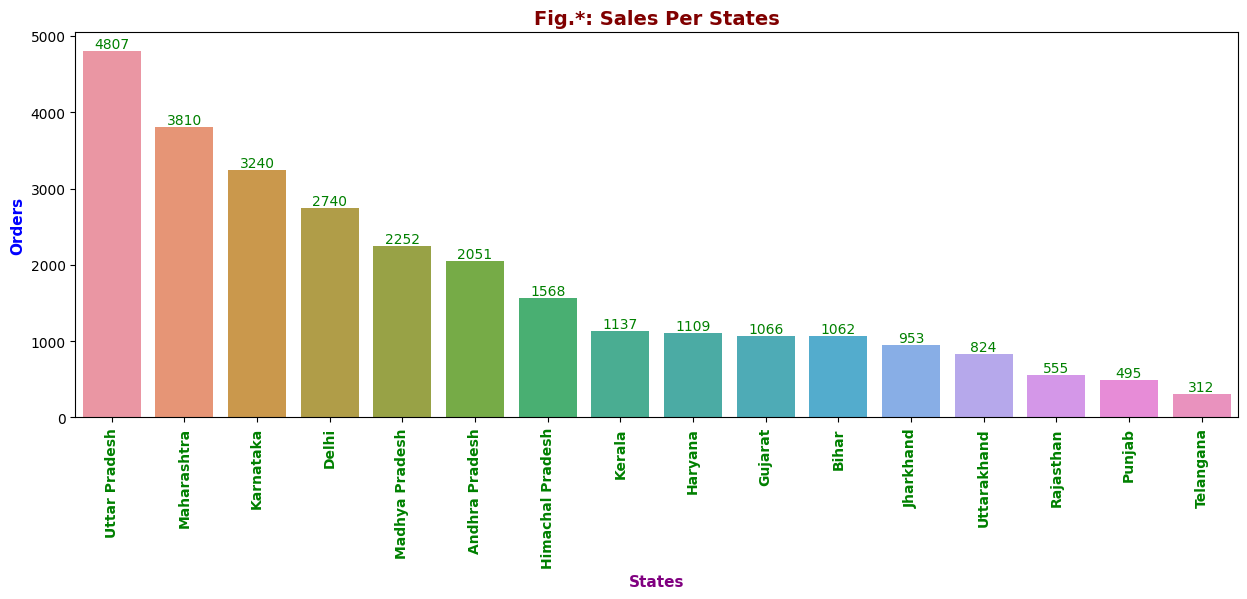

In [24]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data = total_order_per_state, x = 'State',y= 'Orders')

for bars in ax.containers:
    ax.bar_label(bars, color='green')
    
plt.xticks(rotation='vertical', color='g', weight='bold')
plt.xlabel('States', color='purple', size=11, weight='bold' )
plt.ylabel('Orders', color='blue', size=11, weight='bold' )
plt.title('Fig.*: Sales Per States',  color='maroon', size=14, weight='bold')
plt.show()

* ### total Amount sales per states

In [25]:
total_sales_per_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
total_sales_per_state

State    Amount
14     Uttar Pradesh  19374968
10       Maharashtra  14427543
7          Karnataka  13523540
2              Delhi  11603818
9     Madhya Pradesh   8101142
0     Andhra Pradesh   8037146
5   Himachal Pradesh   4963368
4            Haryana   4220175
1              Bihar   4022757
3            Gujarat   3946082
8             Kerala   3894491
6          Jharkhand   3026456
15       Uttarakhand   2520944
12         Rajasthan   1909409
11            Punjab   1525800
13         Telangana   1151490

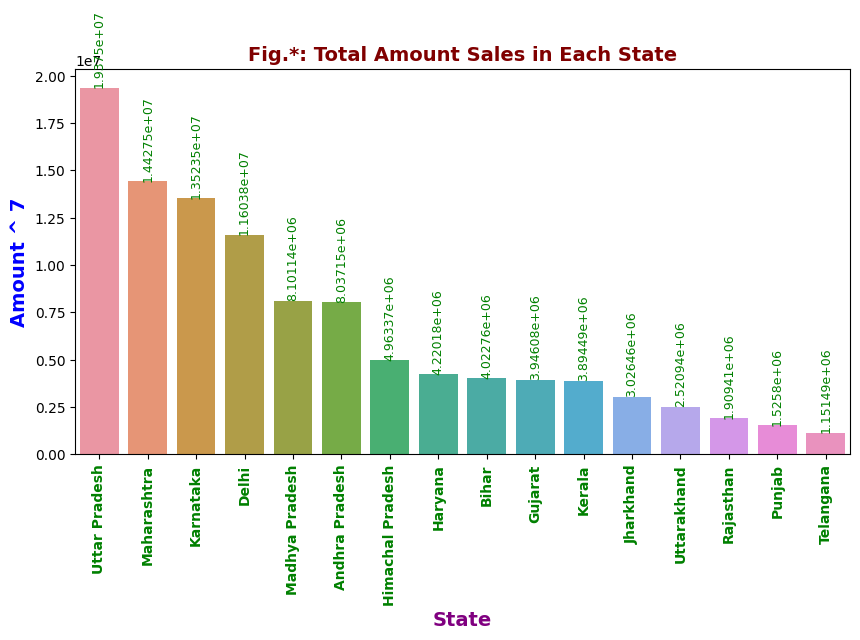

In [26]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data = total_sales_per_state, x = 'State',y= 'Amount')

for bars in ax.containers:
    ax.bar_label(bars, color='green', rotation='vertical', size=9)

plt.ylabel('Amount ^ 7', color='blue', size=14, weight='bold' )
plt.xlabel('State', color='purple', size=14, weight='bold' )
plt.title('Fig.*: Total Amount Sales in Each State',  color='maroon', size=14, weight='bold')
plt.xticks(rotation='vertical', color='g', weight='bold')
plt.show()

# MARITAL STATUS

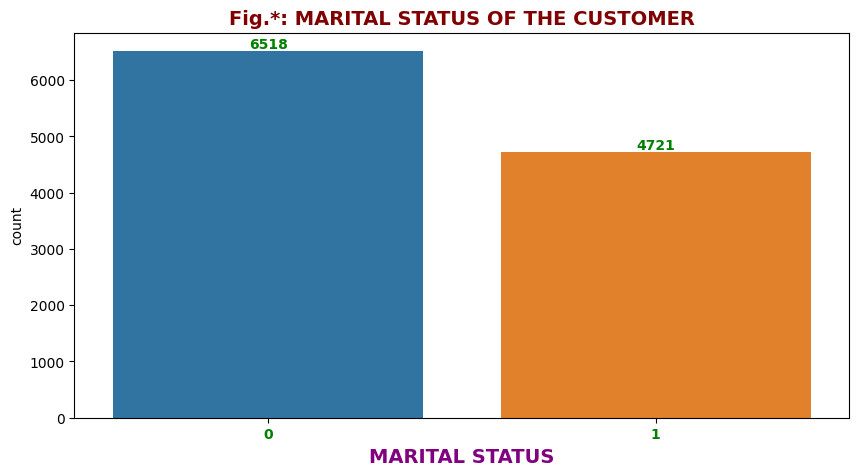

In [27]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data = df, x = 'Marital_Status')

for bars in ax.containers:
    ax.bar_label(bars, color='green', weight='bold')

plt.xlabel('MARITAL STATUS', color='purple', size=14, weight='bold' )
plt.title('Fig.*: MARITAL STATUS OF THE CUSTOMER',  color='maroon', size=14, weight='bold')
plt.xticks(color='g', weight='bold')
plt.show()

#### From above graphs we can see that most of the buyers are married  and they have high purchasing power

In [29]:
sales_gender_per_marital_status = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_gender_per_marital_status

Marital_Status Gender    Amount
0               0      F  43786646
2               1      F  30549207
1               0      M  18338738
3               1      M  13574538

#### From above we can see that most of the buyers are married (women) and they have high purchasing power

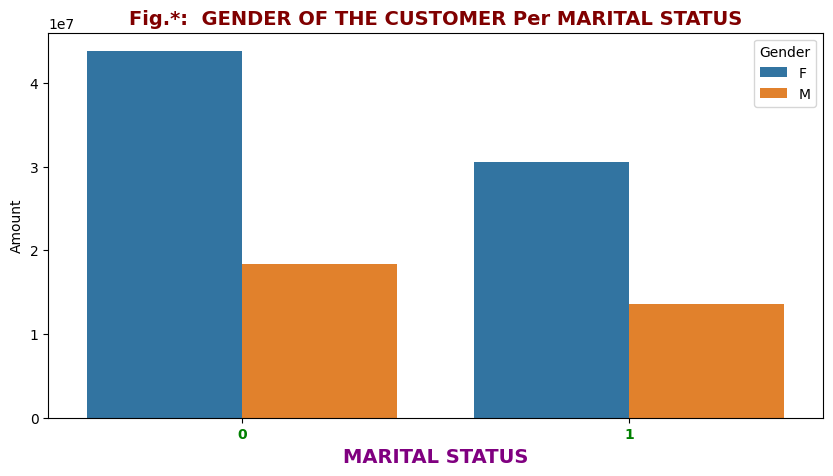

In [30]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data = sales_gender_per_marital_status, x = 'Marital_Status',y= 'Amount', hue='Gender')
df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)



plt.xlabel('MARITAL STATUS', color='purple', size=14, weight='bold' )
plt.title('Fig.*:  GENDER OF THE CUSTOMER Per MARITAL STATUS',  color='maroon', size=14, weight='bold')
plt.xticks(color='g', weight='bold')
plt.show()


In [31]:
df.head()

User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  Amount  
0     Maharashtra   Western       Healthcare             Auto       1   23952  
1  Andhra Pradesh  Southern             Govt             Auto       3   23934  
2   Uttar Pradesh   Central       Automobile             Auto       3   23924  
3       Karnataka  Southern     Construction             Auto       2   23912  
4         Gujarat   Western  Food Processing             Auto       2   23877

# Occcupation

In [32]:
omobuwa = df.groupby('Occupation')['Orders'].count().reset_index()
omobuwa

Occupation  Orders
0       Agriculture     283
1        Automobile     565
2          Aviation    1310
3           Banking    1137
4          Chemical     541
5      Construction     414
6   Food Processing     423
7              Govt     854
8        Healthcare    1408
9       Hospitality     703
10        IT Sector    1583
11           Lawyer     531
12            Media     637
13           Retail     501
14          Textile     349

In [33]:
omobuwa.nlargest(n=15, columns='Orders')

Occupation  Orders
10        IT Sector    1583
8        Healthcare    1408
2          Aviation    1310
3           Banking    1137
7              Govt     854
9       Hospitality     703
12            Media     637
1        Automobile     565
4          Chemical     541
11           Lawyer     531
13           Retail     501
6   Food Processing     423
5      Construction     414
14          Textile     349
0       Agriculture     283

### From above Table we can see in descending order of the Occupation with their purchasing power

In [34]:
px.bar(omobuwa, x='Occupation', y='Orders', color='Occupation', text='Orders',title='Customers Occupation')


In [35]:
df['Occupation'].unique()

array(['Healthcare', 'Govt', 'Automobile', 'Construction',
       'Food Processing', 'Lawyer', 'Media', 'Banking', 'Retail',
       'IT Sector', 'Aviation', 'Hospitality', 'Agriculture', 'Textile',
       'Chemical'], dtype=object)

In [36]:
ade = df['Occupation']
ade

0             Healthcare
1                   Govt
2             Automobile
3           Construction
4        Food Processing
              ...       
11246           Chemical
11247         Healthcare
11248            Textile
11249        Agriculture
11250         Healthcare
Name: Occupation, Length: 11239, dtype: object

In [37]:
df['Occupation'].to_list()

['Healthcare',
 'Govt',
 'Automobile',
 'Construction',
 'Food Processing',
 'Food Processing',
 'Lawyer',
 'Govt',
 'Media',
 'Banking',
 'Retail',
 'IT Sector',
 'Automobile',
 'Govt',
 'Aviation',
 'Hospitality',
 'Hospitality',
 'Govt',
 'Banking',
 'IT Sector',
 'Automobile',
 'Automobile',
 'IT Sector',
 'Banking',
 'Banking',
 'Govt',
 'Aviation',
 'Aviation',
 'Food Processing',
 'Automobile',
 'Media',
 'Healthcare',
 'Govt',
 'Media',
 'Aviation',
 'Media',
 'Banking',
 'Aviation',
 'Banking',
 'Food Processing',
 'Aviation',
 'Aviation',
 'Agriculture',
 'Banking',
 'Construction',
 'Retail',
 'IT Sector',
 'IT Sector',
 'IT Sector',
 'Textile',
 'Lawyer',
 'Media',
 'IT Sector',
 'Agriculture',
 'IT Sector',
 'IT Sector',
 'Construction',
 'Healthcare',
 'Agriculture',
 'Govt',
 'Automobile',
 'Aviation',
 'IT Sector',
 'Hospitality',
 'Construction',
 'Media',
 'Banking',
 'Govt',
 'Media',
 'Aviation',
 'IT Sector',
 'Media',
 'Hospitality',
 'Media',
 'IT Sector',
 'Govt

In [38]:
df['Occupation'].fillna('0').to_list()

['Healthcare',
 'Govt',
 'Automobile',
 'Construction',
 'Food Processing',
 'Food Processing',
 'Lawyer',
 'Govt',
 'Media',
 'Banking',
 'Retail',
 'IT Sector',
 'Automobile',
 'Govt',
 'Aviation',
 'Hospitality',
 'Hospitality',
 'Govt',
 'Banking',
 'IT Sector',
 'Automobile',
 'Automobile',
 'IT Sector',
 'Banking',
 'Banking',
 'Govt',
 'Aviation',
 'Aviation',
 'Food Processing',
 'Automobile',
 'Media',
 'Healthcare',
 'Govt',
 'Media',
 'Aviation',
 'Media',
 'Banking',
 'Aviation',
 'Banking',
 'Food Processing',
 'Aviation',
 'Aviation',
 'Agriculture',
 'Banking',
 'Construction',
 'Retail',
 'IT Sector',
 'IT Sector',
 'IT Sector',
 'Textile',
 'Lawyer',
 'Media',
 'IT Sector',
 'Agriculture',
 'IT Sector',
 'IT Sector',
 'Construction',
 'Healthcare',
 'Agriculture',
 'Govt',
 'Automobile',
 'Aviation',
 'IT Sector',
 'Hospitality',
 'Construction',
 'Media',
 'Banking',
 'Govt',
 'Media',
 'Aviation',
 'IT Sector',
 'Media',
 'Hospitality',
 'Media',
 'IT Sector',
 'Govt

In [39]:
ade = ' '.join(df['Occupation'].fillna('0').to_list())
ade

'Healthcare Govt Automobile Construction Food Processing Food Processing Lawyer Govt Media Banking Retail IT Sector Automobile Govt Aviation Hospitality Hospitality Govt Banking IT Sector Automobile Automobile IT Sector Banking Banking Govt Aviation Aviation Food Processing Automobile Media Healthcare Govt Media Aviation Media Banking Aviation Banking Food Processing Aviation Aviation Agriculture Banking Construction Retail IT Sector IT Sector IT Sector Textile Lawyer Media IT Sector Agriculture IT Sector IT Sector Construction Healthcare Agriculture Govt Automobile Aviation IT Sector Hospitality Construction Media Banking Govt Media Aviation IT Sector Media Hospitality Media IT Sector Govt Govt Healthcare Textile Lawyer IT Sector Banking Lawyer Chemical Banking Food Processing Aviation Automobile Aviation Automobile IT Sector IT Sector Construction Lawyer Automobile Chemical Govt Textile IT Sector Healthcare Agriculture Retail Healthcare Hospitality Hospitality Retail Food Processing 

In [40]:
def plot_wordcloud(text):
    mywordcloud = WordCloud().generate(text)
    plt.imshow(mywordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show(block=True)

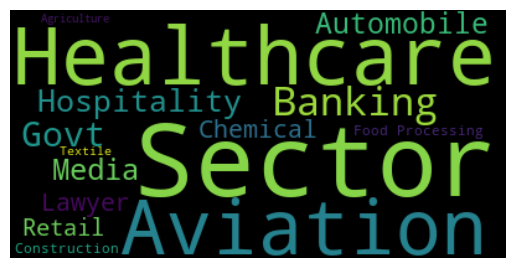

In [42]:
plot_wordcloud(ade)

# Customers  Occupation

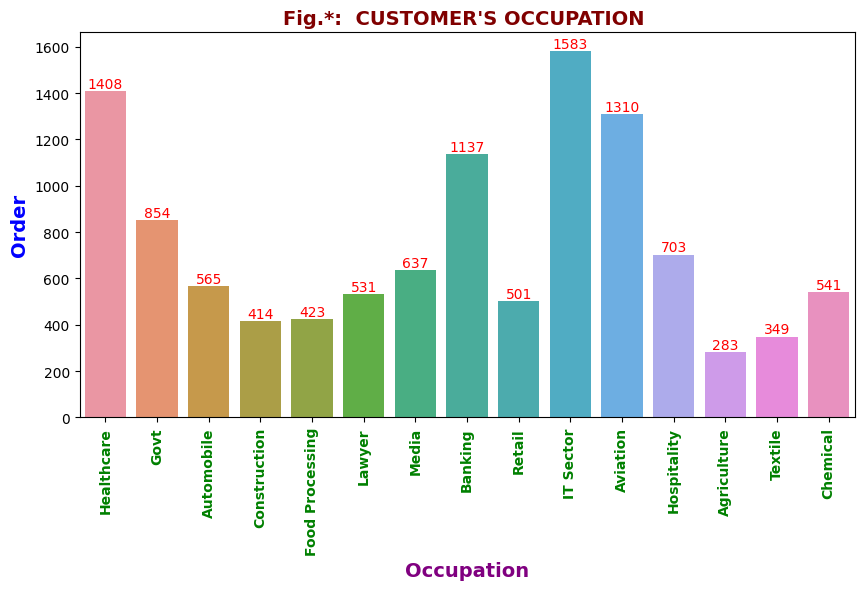

In [43]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars, color='red')
    
plt.xlabel('Occupation', color='purple', size=14, weight='bold' )
plt.title("Fig.*:  CUSTOMER'S OCCUPATION ",  color='maroon', size=14, weight='bold')
plt.ylabel('Order', color='blue', size=14, weight='bold' )
plt.xticks(color='g', weight='bold', rotation='vertical')
plt.show()


<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

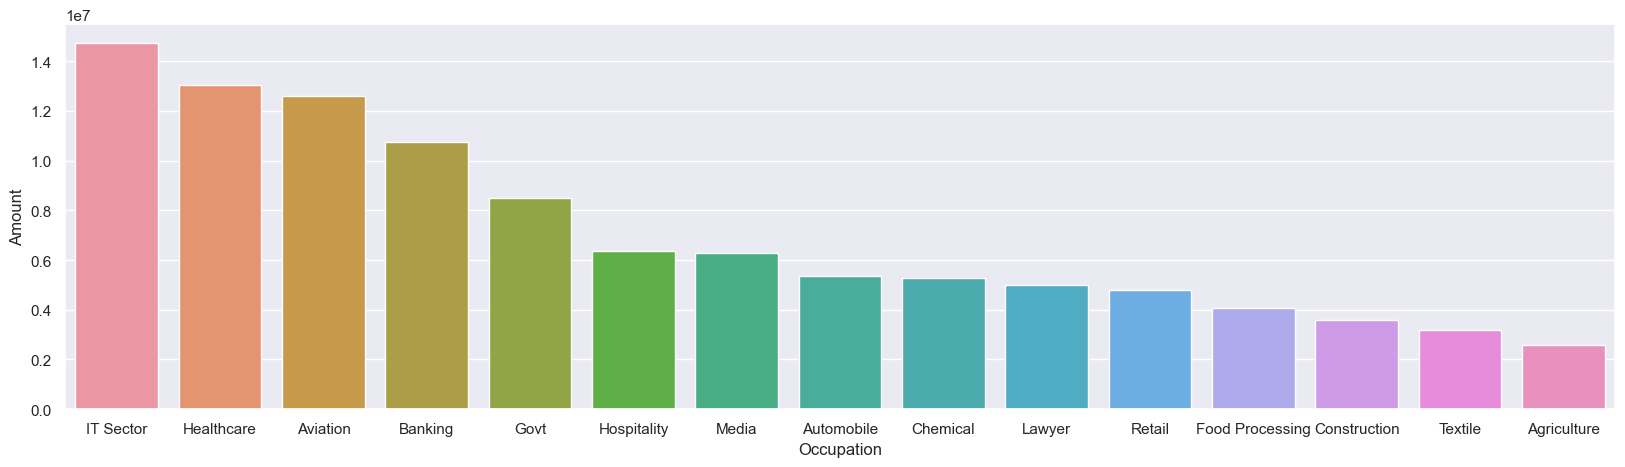

In [44]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

#### From above graphs we can see thatmost of the buyers are working in IT, Healthcare and Aviation sector

# Product Category

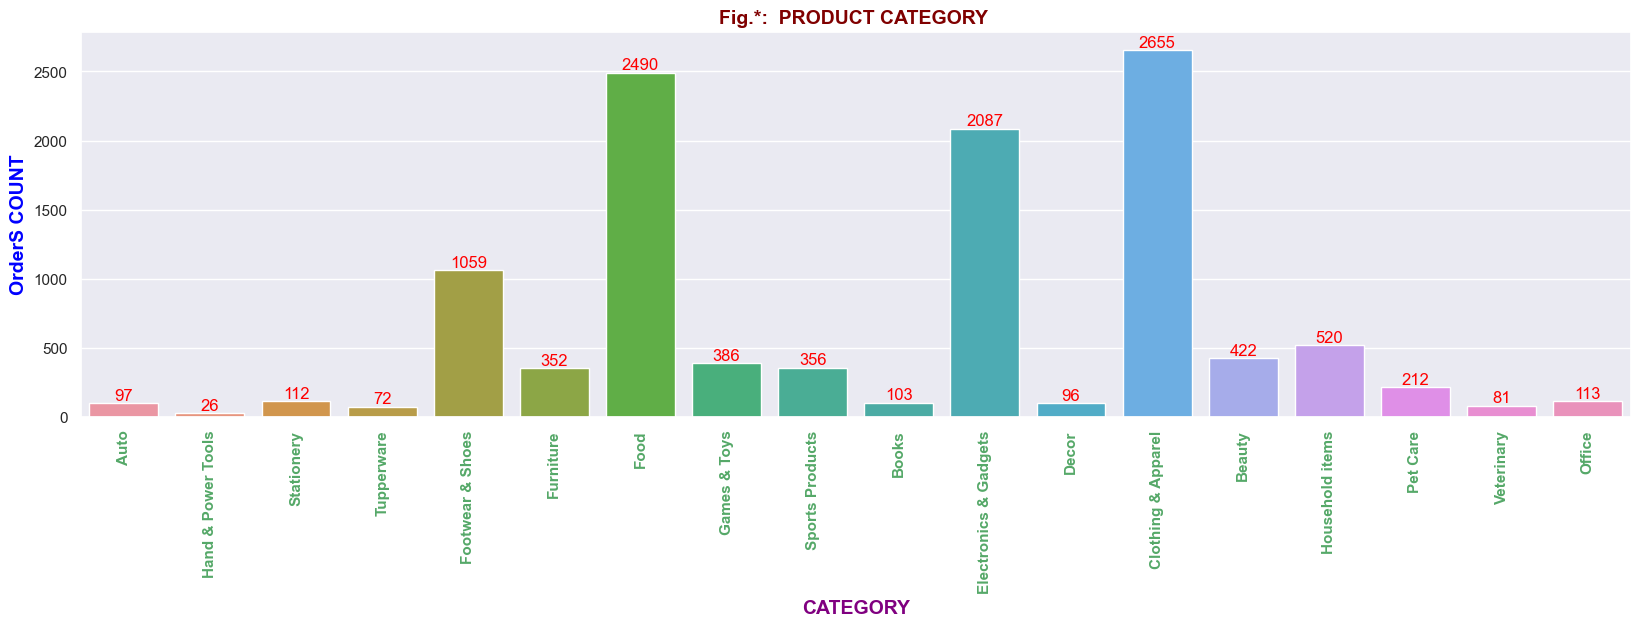

In [45]:
plt.figure(figsize=(20, 5))
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars, color='red')
    
plt.xlabel('CATEGORY', color='purple', size=14, weight='bold' )
plt.title("Fig.*:  PRODUCT CATEGORY ",  color='maroon', size=14, weight='bold')
plt.ylabel('OrderS COUNT', color='blue', size=14, weight='bold' )
plt.xticks(color='g', weight='bold', rotation='vertical')
plt.show()

In [46]:
most_10_sale_product = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
most_10_sale_product

Product_Category    Amount
6                    Food  33933883
3      Clothing & Apparel  16495019
5   Electronics & Gadgets  15643846
7        Footwear & Shoes  15575209
8               Furniture   5440051
9            Games & Toys   4331694
14        Sports Products   3635933
1                  Beauty   1959484
0                    Auto   1958609
15             Stationery   1676051

#### From above table we can see that most of the sold products are from Food, Clothing and Electronics category

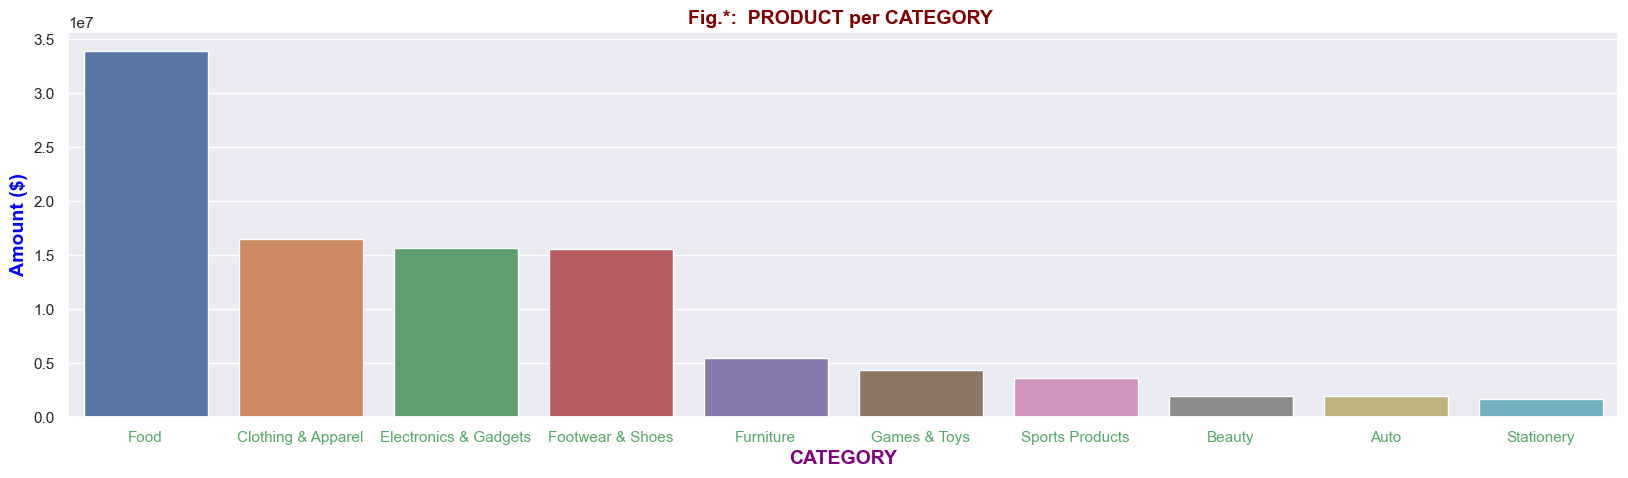

In [47]:
plt.figure(figsize=(20, 5))
sns.barplot(data = most_10_sale_product, x = 'Product_Category',y= 'Amount')
plt.xlabel('CATEGORY', color='purple', size=14, weight='bold' )
plt.title("Fig.*:  PRODUCT per CATEGORY ",  color='maroon', size=14, weight='bold')
plt.ylabel('Amount ($)', color='blue', size=14, weight='bold' )
plt.xticks(color='g')
plt.show()

#### From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

In [48]:
product_id = df.groupby(['Product_ID'], as_index=False)['Orders'].sum()
product_id

Product_ID  Orders
0     P00000142      57
1     P00000242      15
2     P00000342      16
3     P00000442       1
4     P00000542       6
...         ...     ...
2345   P0099042      19
2346   P0099242      19
2347   P0099342      25
2348   P0099442      10
2349   P0099742       3

[2350 rows x 2 columns]

In [49]:
high_product_id = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
high_product_id

Product_ID  Orders
1679  P00265242     127
644   P00110942     116
1504  P00237542      91
1146  P00184942      82
679   P00114942      79
171   P00025442      79
708   P00117942      76
888   P00145042      76
298   P00044442      75
643   P00110842      74

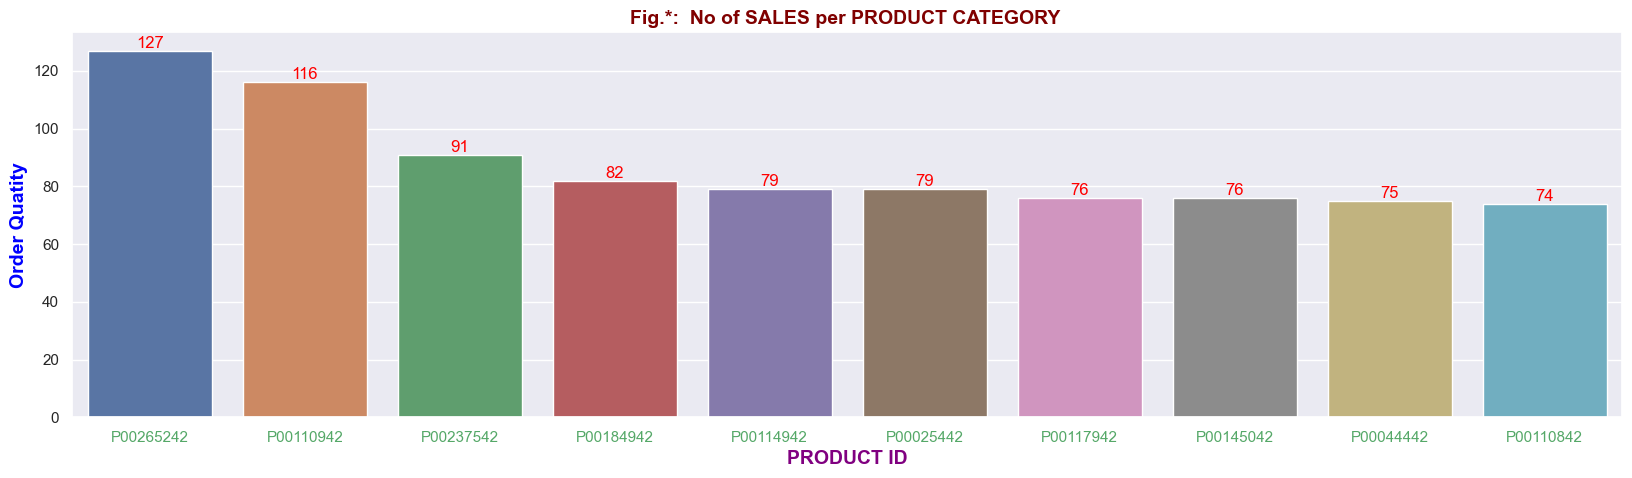

In [51]:
plt.figure(figsize=(20, 5))
ax = sns.barplot(data = high_product_id, x = 'Product_ID',y= 'Orders')

for bars in ax.containers:
    ax.bar_label(bars, color='red')
    
plt.xlabel('PRODUCT ID', color='purple', size=14, weight='bold' )
plt.title("Fig.*:  Top TEn SALE PRODUCT ",  color='maroon', size=14, weight='bold')
plt.ylabel('Order Quatity', color='blue', size=14, weight='bold' )
plt.xticks(color='g')
plt.show()

# top 10 most sold products like Above 

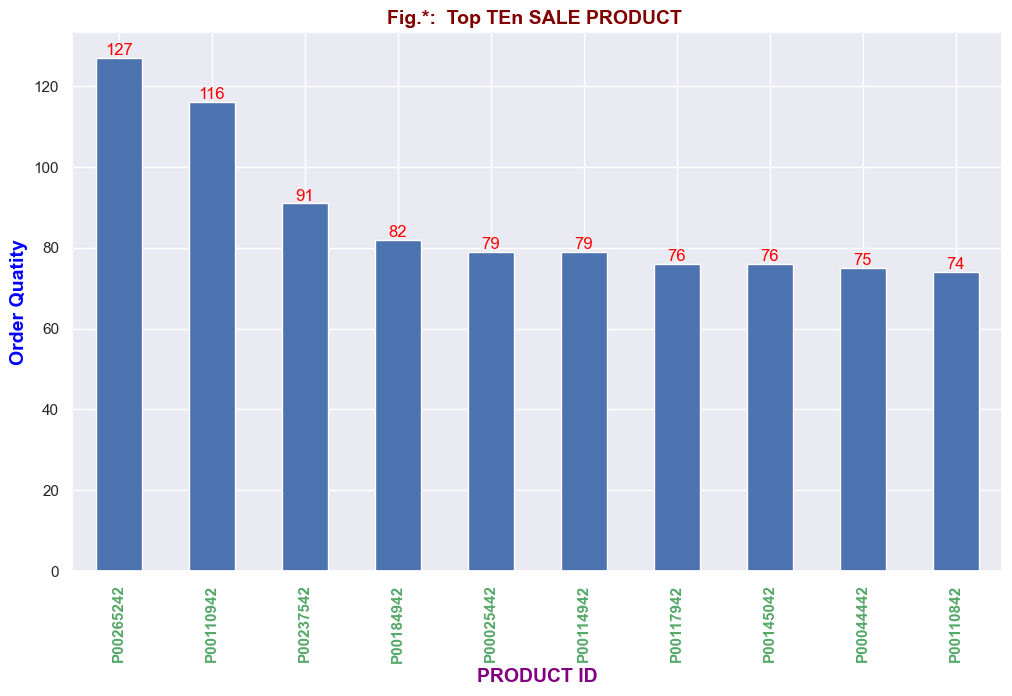

In [54]:
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
for bars in ax1.containers:
    ax1.bar_label(bars, color='red')
    
plt.xlabel('PRODUCT ID', color='purple', size=14, weight='bold' )
plt.title("Fig.*:  Top TEn SALE PRODUCT ",  color='maroon', size=14, weight='bold')
plt.ylabel('Order Quatity', color='blue', size=14, weight='bold' )
plt.xticks(color='g', weight='bold')
plt.show()